# Chain of coupled Hydrogen-like atoms
## Prerequisites

In [1]:
%matplotlib inline
from IPython.display import display, Math, Latex
import numpy as np
np.warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

import tb

 _   _                   _   _      _   
| \ | | __ _ _ __   ___ | \ | | ___| |_ 
|  \| |/ _` | '_ \ / _ \|  \| |/ _ \ __|
| |\  | (_| | | | | (_) | |\  |  __/ |_ 
|_| \_|\__,_|_| |_|\___/|_| \_|\___|\__|
                                        

Vesion 1.0


## Adding new species

Let us define two atoms, called A and B, each has a single $s$ orbital and diffrrent energies -1 eV and -0.7 eV.

In [2]:
a = tb.Orbitals('A')
a.add_orbital(title='s', energy=-1, )
b = tb.Orbitals('B')
b.add_orbital(title='s', energy=-0.7, )

The geometrical parameters of the system are specified by a xyz-file:

In [3]:
xyz_file="""2
H cell
A       0.0000000000    0.0000000000    0.0000000000
B       0.0000000000    0.0000000000    1.0000000000
"""

Now one needs to specify the coupling parameters between pairs of atoms with a given diatomic symmetry:

In [4]:
tb.set_tb_params(PARAMS_A_B={'ss_sigma': 0.3})

## Computing Hamiltonian matrix elements
At this point the hamiltonian matrix can be computed and visualized:

In [5]:
h = tb.Hamiltonian(xyz=xyz_file, nn_distance=1.1).initialize()

The verbosity level is 2
The radius of the neighbourhood is 1.1 Ang

---------------------------------

The xyz-file:
 2
H cell
A       0.0000000000    0.0000000000    0.0000000000
B       0.0000000000    0.0000000000    1.0000000000

---------------------------------

Basis set 
 Num of species {'A': 1, 'B': 1} 


 A 
title | energy | n | l | m | s
------+--------+---+---+---+--
s     | -1     | 0 | 0 | 0 | 0
------+--------+---+---+---+--
 

 B 
title | energy | n | l | m | s
------+--------+---+---+---+--
s     | -0.7   | 0 | 0 | 0 | 0
------+--------+---+---+---+--
 
---------------------------------

Radial dependence function: None

---------------------------------

Discrete radial dependence function: None

---------------------------------

Unique distances: 
    1. Ang between atoms B and A
    1. Ang between atoms A and B
---------------------------------



[[-1. +0.j  0.3+0.j]
 [ 0.3+0.j -0.7+0.j]]


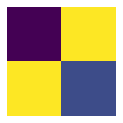

In [6]:
plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(np.real(h.h_matrix))
print(h.h_matrix)

Let us specify periodic bondary conditions. Below, assume that system is translated in along axis z:

In [7]:
PRIMITIVE_CELL = [[0, 0, 2.0]]
h.set_periodic_bc(PRIMITIVE_CELL)

Primitive_cell_vectors: 
 [[0, 0, 2.0]] 

---------------------------------



## Band structure computation and visualization

Now we determine a set of k-points where we want to compute band structure.

In [8]:
num_points = 20
kk = np.linspace(0, 3.14/2, num_points, endpoint=True)

The band structure computations are performed below for each k-point:

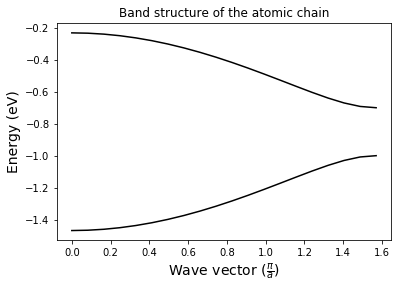

In [9]:
band_sructure = []

for jj in range(num_points):
    vals, _ = h.diagonalize_periodic_bc([0.0, 0.0, kk[jj]])
    band_sructure.append(vals)

band_sructure = np.array(band_sructure)

ax = plt.axes()
ax.set_title('Band structure of the atomic chain')
ax.set_xlabel(r'Wave vector ($\frac{\pi}{a}$)', fontsize=14)
ax.set_ylabel(r'Energy (eV)', fontsize=14)
ax.plot(kk, np.sort(np.real(band_sructure)), 'k')
plt.show()